In [1]:
# import libraries
# Standard operational package imports
import numpy as np
import pandas as pd

# Important imports for modeling and evaluation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# (To create synthetic data)
from sklearn.datasets import make_blobs

# Visualization package import
import seaborn as sns

### Create the data
In practice, you'd have a dataset of real data, and you'd read in this data and perform EDA, data cleaning, and other manipulations to prepare it for modeling. For simplicity and to help us focus on the modeling itself, we're going to use synthetic data for this demonstration.

We'll start by creating a random number generator. This is to help with the process of creating reproducible synthetic data. We'll use it to create clustered data without us knowing how many clusters there are.

In [2]:
# Create random number generator
rng = np.random.default_rng(seed=44)

In [3]:
# Create synthetic data w/ unknown number of clusters
centers = rng.integers(low=3, high=7)
X, y = make_blobs(n_samples=1000, n_features=6, centers=centers, random_state=42)

In [4]:
# Create Pandas dataframe from the data
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5
0,-1.534288,5.467808,-6.945988,1.403934,1.553836,-7.618236
1,-6.681020,6.717808,2.764396,4.460744,-8.286569,10.959708
2,-8.678310,7.825306,3.139699,5.609951,-9.948079,8.072149
3,-6.667385,7.147637,2.145505,4.712937,-9.544708,11.093248
4,-2.753835,-4.209968,0.620345,-7.439505,-4.405723,-2.046149


### scale the data
Since K-means uses distance between observations and centroids as its measure of similarity, it's important to scale your data before modeling, if it's not already scaled. It's important to scale because K-means doesn't know what your unit label is for each variable.


In [5]:
# Scale the data
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:2,:]

array([[-0.03173691,  0.4864719 , -1.32178135,  0.59808997,  1.5703227 ,
        -0.88951855],
       [-1.05006137,  0.68381835,  0.74465777,  1.2564266 , -0.97057774,
         1.92995522]])

In [6]:
#Now that the data is scaled, we can start modeling. Since we don't know how many clusters exist in the data, 
#we'll begin by examining the inertia values for different values of k.

#initintiate model

kmeans3 = KMeans(n_clusters=3, random_state=42)

In [7]:
#fit model to data
kmeans3.fit(X_scaled)

c:\Users\E7440\.conda\envs\tensorflow_test\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [9]:
print("Cluters: ", kmeans3.labels_)
print("Intertia:", kmeans3.inertia_)

Cluters:  [2 0 0 0 1 1 1 0 0 2 1 0 0 2 0 0 0 0 1 1 1 0 0 0 2 2 1 0 0 1 1 0 1 1 2 2 1
 0 0 0 1 0 1 0 0 1 1 2 0 2 1 1 1 2 2 2 1 0 1 2 1 1 1 1 1 1 1 2 1 1 0 1 1 1
 0 1 0 2 2 0 2 0 1 2 1 0 2 2 0 2 0 1 2 0 1 2 1 0 0 1 1 0 0 0 0 0 0 1 1 0 2
 1 0 1 0 0 1 1 2 1 1 1 0 1 1 0 0 1 2 0 2 2 2 1 0 2 2 1 0 1 1 1 0 2 2 2 1 1
 0 1 1 0 1 1 0 0 2 0 2 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 2 0 0 2 2 1 0 1 0 1
 0 2 0 2 0 1 1 1 0 0 0 2 2 0 1 0 0 1 0 1 1 1 1 1 2 1 2 0 0 1 2 2 0 1 1 2 1
 0 0 0 0 1 1 1 0 2 1 2 0 2 0 2 1 1 0 0 0 2 2 1 1 2 2 2 0 0 0 1 1 1 0 0 0 1
 0 1 2 1 0 0 2 2 1 1 0 1 2 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 2 1 0 1 2 2
 1 0 0 1 0 0 0 0 0 0 2 0 2 1 0 0 2 1 1 0 1 0 0 2 0 1 0 0 0 1 1 1 2 2 2 1 2
 2 2 0 0 2 0 2 1 0 1 2 0 2 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 2 0 0 0 0 0 1 1 2
 1 0 0 1 0 1 1 0 1 0 2 0 0 1 0 1 1 2 0 1 1 1 2 1 1 0 1 0 1 0 2 0 1 0 0 1 1
 2 0 1 1 2 1 1 0 0 0 0 1 0 1 0 0 2 2 1 2 1 1 1 0 0 2 1 0 0 0 1 0 1 0 2 0 1
 2 1 1 1 0 1 2 0 1 2 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 2 1 2 0 1 1 1 1 2 0
 0 1 0 0 2 2 0 

In [10]:
#evaluate inertia

#Create a list from 2-10.

num_clusters = [i for i in range(2,11)]

def kmeans_inertia(num_clusters, x_vals):
    '''
    Fits a KMeans model for different values of k. calculates an inertia scores for each k values.

    Args:
        num_clusters: (list of ints) - The different k values to try
        x_vals:       (array)        - The training data

    Returns:
        inertia:      (list)          - A list of inertia scores, one for each \
                                      value of k
    '''

    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)
    
    return inertia


In [11]:
# Calculate inertia for k=2-10
inertia = kmeans_inertia(num_clusters, X_scaled)
inertia

c:\Users\E7440\.conda\envs\tensorflow_test\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\E7440\.conda\envs\tensorflow_test\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\E7440\.conda\envs\tensorflow_test\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\E7440\.conda\envs\tensorflow_test\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default 

[3090.3260348468543,
 1748.1488703079513,
 863.1663243212959,
 239.65434758718436,
 231.15033338571047,
 221.52415409298428,
 214.8749727878298,
 206.2967615147025,
 199.85993193411025]

c:\Users\E7440\.conda\envs\tensorflow_test\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\E7440\.conda\envs\tensorflow_test\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\E7440\.conda\envs\tensorflow_test\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\E7440\.conda\envs\tensorflow_test\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

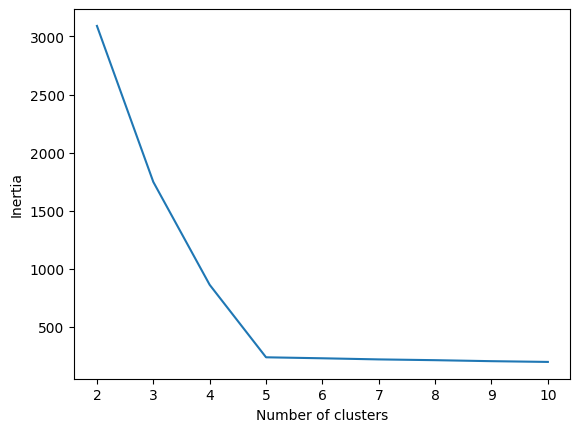

In [12]:
# Create an elbow plot
plot = sns.lineplot(x=num_clusters, y=inertia)
plot.set_xlabel("Number of clusters");
plot.set_ylabel("Inertia");

In [13]:
# Get silhouette score for kmeans3 model
kmeans3_sil_score = silhouette_score(X_scaled, kmeans3.labels_)
kmeans3_sil_score

0.5815196371994132

In [14]:
def kmeans_sil(num_clusters, x_vals):
    '''
    Fits a KMeans model for different values of k.
    Calculates a silhouette score for each k value

    Args:
        num_clusters: (list of ints)  - The different k values to try
        x_vals:       (array)         - The training data

    Returns: 
        sil_score:    (list)          - A list of silhouette scores, one for each \
                                      value of k
    '''
  
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))
    
    return sil_score

In [15]:
# Calculate silhouette scores for k=2-10
sil_score = kmeans_sil(num_clusters, X_scaled)
sil_score

c:\Users\E7440\.conda\envs\tensorflow_test\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\E7440\.conda\envs\tensorflow_test\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\E7440\.conda\envs\tensorflow_test\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\E7440\.conda\envs\tensorflow_test\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default 

[0.4792051309087745,
 0.5815196371994132,
 0.6754359269330664,
 0.7670656870960783,
 0.6386298233446862,
 0.5255232814143497,
 0.4075837029239973,
 0.27954043923384386,
 0.14988364343771404]

c:\Users\E7440\.conda\envs\tensorflow_test\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\E7440\.conda\envs\tensorflow_test\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\E7440\.conda\envs\tensorflow_test\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\E7440\.conda\envs\tensorflow_test\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

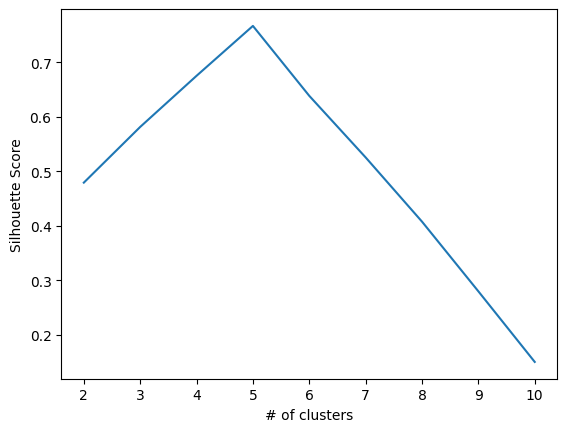

In [16]:
# Create a line plot of silhouette scores 
plot = sns.lineplot(x=num_clusters, y=sil_score)
plot.set_xlabel("# of clusters");
plot.set_ylabel("Silhouette Score");

In [17]:
# Verify our findings (only possible when "correct" number of clusters exists)
centers

5

# Further analysis

In [18]:
# Fit a 5-cluster model to the data
kmeans5 = KMeans(n_clusters=5, random_state=42)
kmeans5.fit(X_scaled)

c:\Users\E7440\.conda\envs\tensorflow_test\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

In [19]:
print(kmeans5.labels_[:5])
print('Unique labels:', np.unique(kmeans5.labels_))

[2 4 4 4 1]
Unique labels: [0 1 2 3 4]


In [20]:
X['cluster'] = kmeans5.labels_
X.head()

,0,1,2,3,4,5,cluster
0,-1.534288,5.467808,-6.945988,1.403934,1.553836,-7.618236,2
1,-6.681020,6.717808,2.764396,4.460744,-8.286569,10.959708,4
2,-8.678310,7.825306,3.139699,5.609951,-9.948079,8.072149,4
3,-6.667385,7.147637,2.145505,4.712937,-9.544708,11.093248,4
4,-2.753835,-4.209968,0.620345,-7.439505,-4.405723,-2.046149,1


# now predictiong new data

In [21]:
# Create a new observation (for demonstration)
new_observation = rng.uniform(low=-10, high=10, size=6).reshape(1, -1)
new_observation

array([[-4.8377385 , -1.88458544,  9.38367896, -6.7536575 ,  7.14587347,
        -6.73909458]])

In [22]:
# Instantiate the scaler and fit it to the original X data
scaler = StandardScaler().fit(X.iloc[:,:-1])

# Apply the scaler to the new observation
new_observation_scaled = scaler.transform(new_observation)
new_observation_scaled

array([[-0.68535259, -0.67430308,  2.1532887 , -1.15878741,  3.01424824,
        -0.75609599]])

In [23]:
# Predict cluster assignment of new_observation
new_prediction = kmeans5.predict(new_observation_scaled)
new_prediction

array([1])

In [24]:
# Calculate distances between new data and each centroid
distances = kmeans5.transform(new_observation_scaled)
distances

array([[4.55233304, 3.46792667, 4.14567617, 5.11675395, 5.95732403]])

Notice that the .transform_ method returns an array. In this case, we gave the model a single new data point, and it returned an array of five numbers (because our model has five clusters). Each value in the array represents the distance between new_observation_scaled and the centroid of the cluster at that index.

So, the distance between new_observation_scaled and the centroids of:

Cluster 0 = 5.12
Cluster 1 = 4.55
Cluster 2 = 4.15
Cluster 3 = 5.96
Cluster 4 = 3.47

The shortest distance is 3.47—between new_observation_scaled and cluster 4's centroid. This is why the point was assigned to cluster 4 when we used the .predict() method above.